<a href="https://colab.research.google.com/github/rhshovon102/DataMining-MachineLearning/blob/main/SentimentAnalysisBasedOnTweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Dataset Link](https://www.kaggle.com/datasets/saurabhshahane/twitter-sentiment-dataset)

# **Load Dataset**

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/SentimentAnalysisFromTweet/Twitter_Data.csv')
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


# **Data Preprocessing**

**Null Value Handle**

In [39]:
df.isna().sum()

clean_text    4
category      7
dtype: int64

In [40]:
df.dropna(inplace = True)

In [5]:
df.isna().sum()

clean_text    0
category      0
dtype: int64

In [6]:
df.category = df.category.astype(int)

In [7]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1
1,talk all the nonsense and continue all the dra...,0
2,what did just say vote for modi welcome bjp t...,1
3,asking his supporters prefix chowkidar their n...,1
4,answer who among these the most powerful world...,1


**Duplicate Value Handle**

In [8]:
df.drop_duplicates(inplace=True)

**Data Visualization**

In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import re
scr = re.compile('[/{}()\|@,;]')
esr = re.compile('[^0-9a-z#+_]')
sw  = set(stopwords.words('english'))

def clean(text):
  text = text.lower()
  text = scr.sub(' ',text)
  text = esr.sub(' ',text)
  text = ' '.join(word for word in text.split() if word not in sw)
  return text
df.clean_text = df.clean_text.apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
x = df.clean_text
y = df.category
x[0]

'modi promised minimum government maximum governance expected begin difficult job reforming state take years get justice state business exit psus temples'

<Axes: xlabel='category', ylabel='count'>

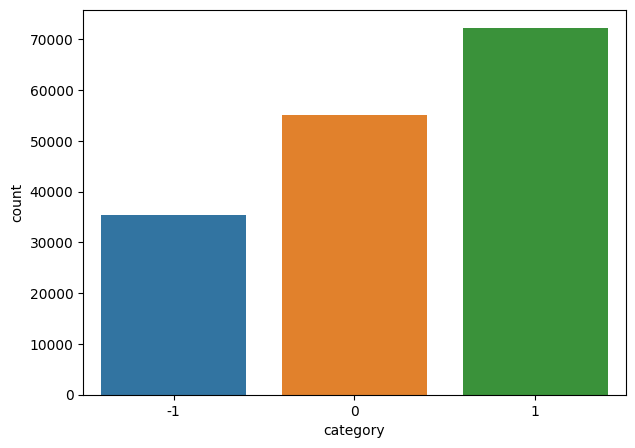

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
sns.countplot(x="category",data=df)

In [12]:
df.category.value_counts()

 1    72249
 0    55211
-1    35509
Name: category, dtype: int64

Text(0.5, 1.0, 'Distribution of sentiments')

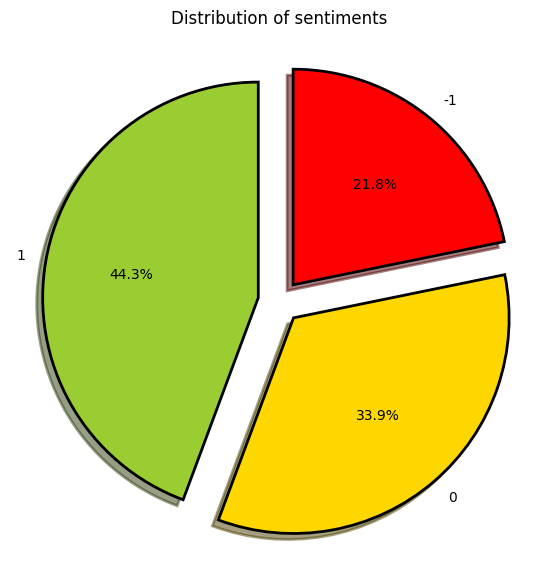

In [13]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['category'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

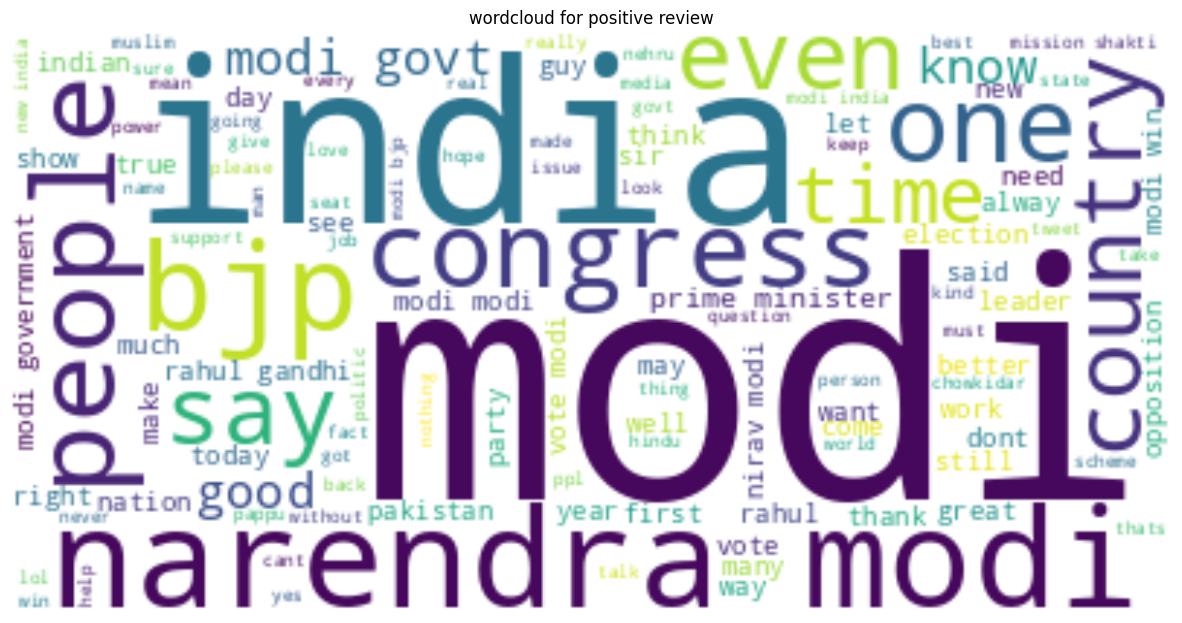

In [14]:
from wordcloud import WordCloud
text = " ".join(i for i in df[df['category']== 1]['clean_text'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for positive review')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size = 0.2)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy_values = []

def evaluate_classifier(pipeline, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    pipeline.fit(x_train, y_train)

    predictions = pipeline.predict(x_test)

    cm = confusion_matrix(y_test, predictions)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
                xticklabels=sorted(set(y_test)),
                yticklabels=sorted(set(y_test)))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    accuracy = accuracy_score(y_test, predictions)
    accuracy_values.append(accuracy)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


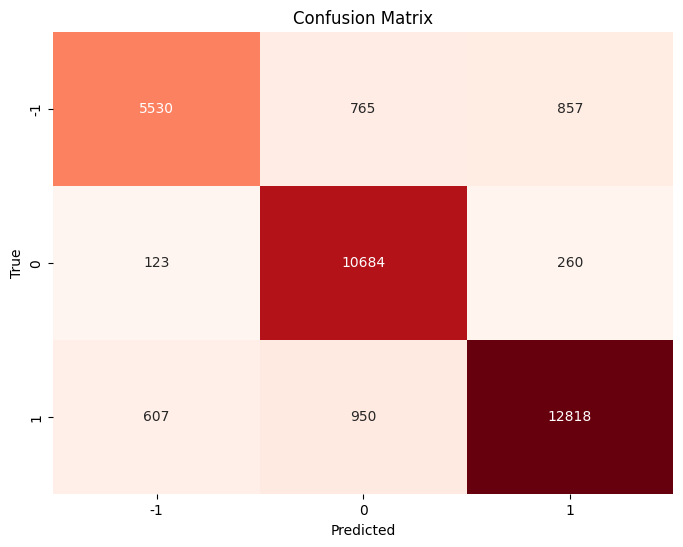

Accuracy: 0.8907
Precision: 0.8921
Recall: 0.8907
F1 Score: 0.8895


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

lr = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

evaluate_classifier(lr, x, y)

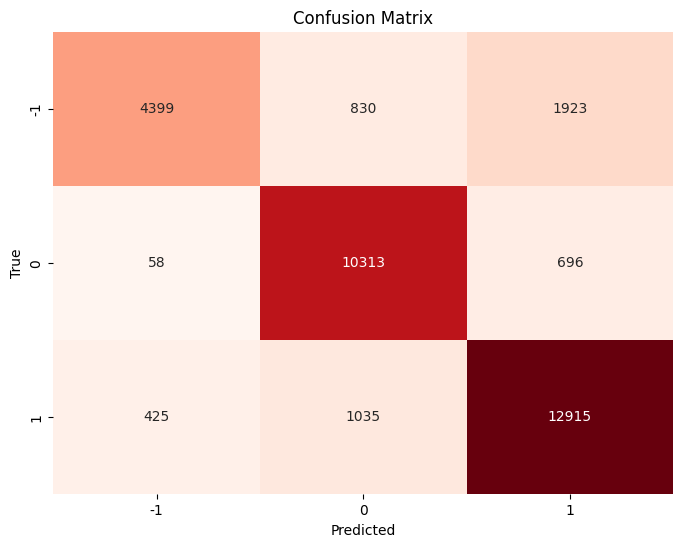

Accuracy: 0.8476
Precision: 0.8519
Recall: 0.8476
F1 Score: 0.8426


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

rf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])

evaluate_classifier(rf, x, y)

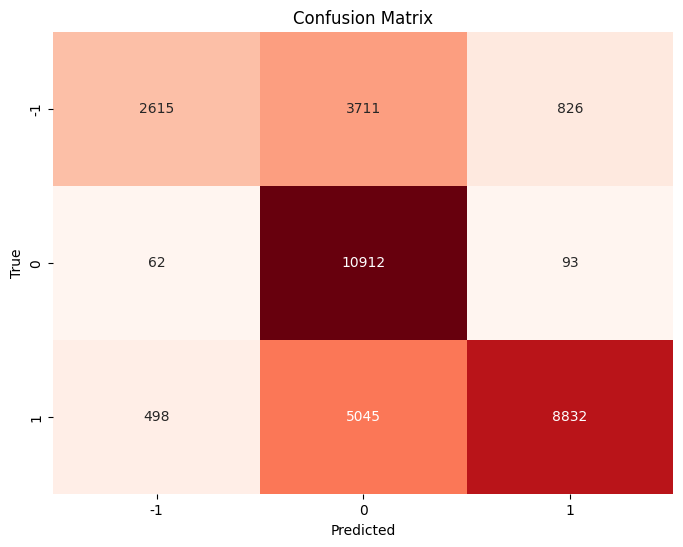

Accuracy: 0.6860
Precision: 0.7686
Recall: 0.6860
F1 Score: 0.6751


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

ab = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', AdaBoostClassifier())
])

evaluate_classifier(ab, x, y)

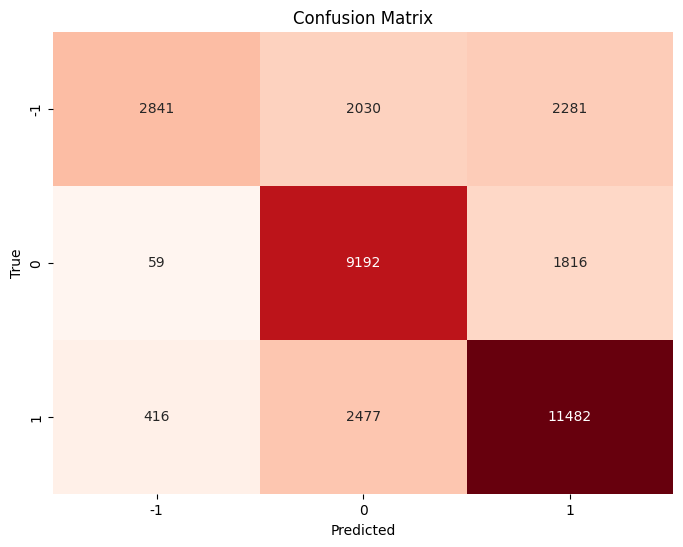

Accuracy: 0.7215
Precision: 0.7409
Recall: 0.7215
F1 Score: 0.7093


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

gb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', GradientBoostingClassifier())
])

evaluate_classifier(gb, x, y)

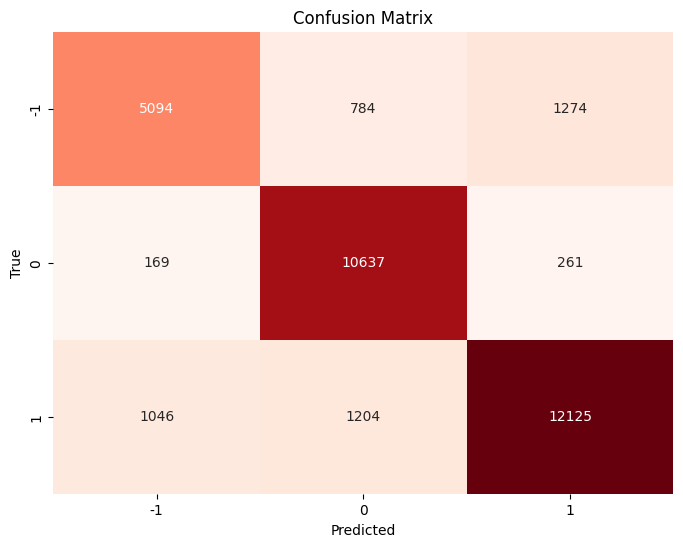

Accuracy: 0.8546
Precision: 0.8547
Recall: 0.8546
F1 Score: 0.8524


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

bc = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', BaggingClassifier())
])

evaluate_classifier(bc, x, y)

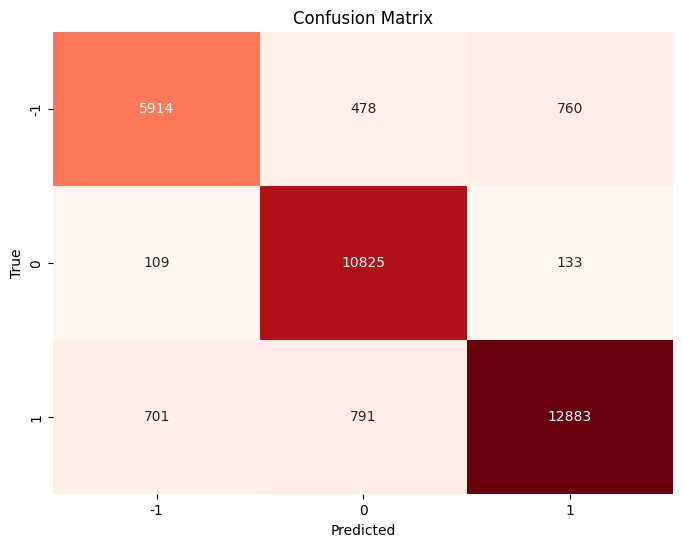

Accuracy: 0.9088
Precision: 0.9094
Recall: 0.9088
F1 Score: 0.9081


In [22]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

linear_svm = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC(kernel='linear'))
])

evaluate_classifier(linear_svm, x, y)

In [25]:
accuracy_values

[0.89071608271461,
 0.8476099895686323,
 0.6859851506412223,
 0.7214518009449592,
 0.8546358225440265,
 0.9088175737865865]

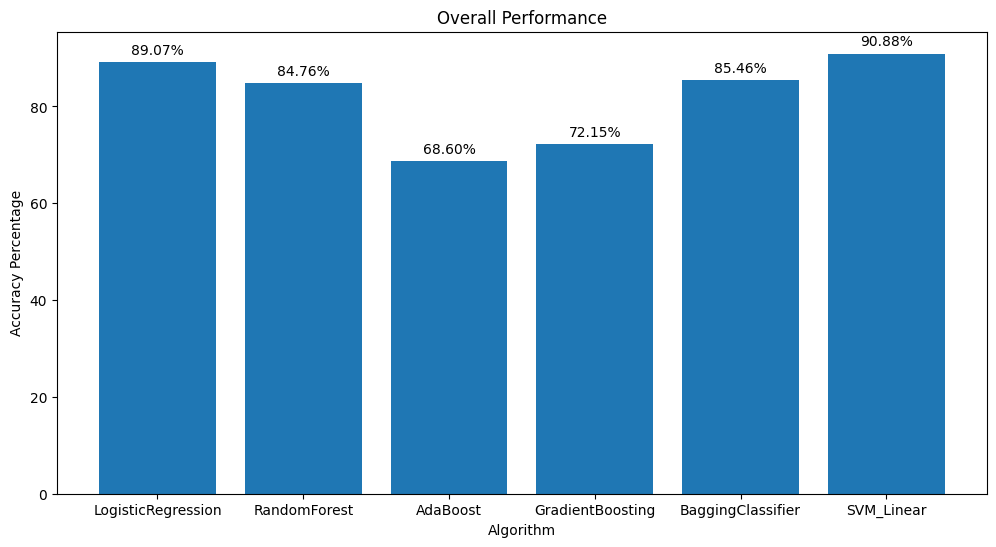

In [36]:
algorithm = ['LogisticRegression','RandomForest', 'AdaBoost', 'GradientBoosting', 'BaggingClassifier', 'SVM_Linear']

accuracy_percentage = [accuracy * 100 for accuracy in accuracy_values]

fig, ax = plt.subplots(figsize=(12, 6))
bars = plt.bar(algorithm, accuracy_percentage)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Percentage')
plt.title('Overall Performance')

for bar, percentage in zip(bars, accuracy_percentage):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()